In [1]:
%matplotlib inline
import numpy as np

import time
#from car_met_hast_STU import car_lik
import math
from numpy.linalg import inv
import matplotlib
from scipy.stats import binom
from scipy.stats import gamma
from scipy.stats import laplace
from scipy.optimize import minimize
from scipy import integrate
from matplotlib import pyplot as plt

def create_interval(P,x,w,u):
    r = np.random.uniform(0,1,1)[0]
    x_l = x - r*w
    x_r = x_l + w
    
    while(P(x_l) > u):
        x_l = x_l - w
    
    while(P(x_r) > u):
        x_r = x_r + w
    
    return x_l, x_r

def modify_interval(x,x2,x_L, x_R):
    x_l = x_L
    x_r = x_R
    if(x2 > x):
        x_r = x2
    else:
        x_l = x2
    return x_l, x_r

Usar dos gaussianas, N1(mu1, sigma2), N2(mu2,sigma2).
P(x|N1,N2) = a1*P(x|N1) + a2*P(x|N2) . Con a1 + a2 = 1

In [2]:
def slice_sampling(P,w,n):
    samples = []
    x = np.random.uniform(1,3,1)[0] #Inicialmente x_0
    samples.append(x)
    for i in range(n):
        u = np.random.uniform(0,P(x),1)[0]
        x_l, x_r = create_interval(P,x,w,u)
        
        while(True):
            x2 = np.random.uniform(x_l,x_r,1)[0]
            
            if P(x2) > u:
                samples.append(x2)
                x = x2
                break
            else:
                x_l, x_r = modify_interval(x,x2,x_l,x_r)
                
    return samples                    

Se utiliza dos gaussianas con parámetro definidos.

In [3]:
a1 = 0.3
a2 = 0.7
sigma1 = 0.5
sigma2 = 0.5
mu1 = 1
mu2 = 3
P1 = lambda x: 1/(sigma1 * np.sqrt(2 * np.pi)) *np.exp( - (x - mu1)**2 / (2 * sigma1**2)) 
P2 = lambda x: 1/(sigma2 * np.sqrt(2 * np.pi)) *np.exp( - (x - mu2)**2 / (2 * sigma2**2)) 
P = lambda x: a1*P1(x) + a2*P2(x)

In [4]:
w = 1
n = 10000
samples = slice_sampling(P,w,n)

Visualización de histograma

(array([ 0.        ,  0.        ,  0.        ,  0.0010002 ,  0.        ,
         0.0030006 ,  0.0070014 ,  0.0140028 ,  0.0140028 ,  0.0260052 ,
         0.0410082 ,  0.040008  ,  0.085017  ,  0.0940188 ,  0.12902581,
         0.15603121,  0.16403281,  0.22704541,  0.21604321,  0.24704941,
         0.24904981,  0.23204641,  0.20704141,  0.17003401,  0.16103221,
         0.13702741,  0.12802561,  0.115023  ,  0.0870174 ,  0.1090218 ,
         0.1130226 ,  0.12702541,  0.20004001,  0.26705341,  0.32306461,
         0.38707742,  0.42808562,  0.50410082,  0.54910982,  0.54010802,
         0.57811562,  0.52910582,  0.47309462,  0.40408082,  0.37507502,
         0.31706341,  0.23204641,  0.19403881,  0.14302861,  0.0830166 ,
         0.0780156 ,  0.0480096 ,  0.0240048 ,  0.0110022 ,  0.0040008 ,
         0.0070014 ,  0.0010002 ,  0.        ,  0.        ]),
 array([ -1.00000000e+00,  -9.00000000e-01,  -8.00000000e-01,
         -7.00000000e-01,  -6.00000000e-01,  -5.00000000e-01,
         -4

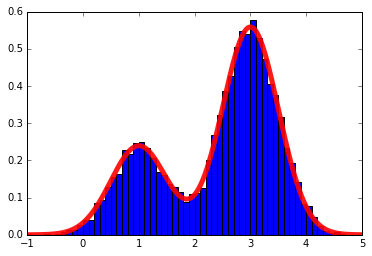

In [5]:
x = np.linspace(-1, 5, 10000)
plt.plot(x, P(x),'r-', lw=5, alpha=0.9, label='laplace pdf')
plt.hist(samples,bins=np.arange(-1,5,0.1),normed=True)

In [6]:
def slice_sampling_animation(P,w,n):
    samples = []
    x_graph = np.linspace(-1, 5, 10000)
    x = np.random.uniform(1,3,1)[0] #Inicialmente x_0
    samples.append(x)
    for i in range(n):
        u = np.random.uniform(0,P(x),1)[0]
        x_l, x_r = create_interval(P,x,w,u)
        plt.clf()
        plt.plot(x_graph, P(x_graph),'r-', lw=3, alpha=0.9)
        plt.plot([x_l,x_r], [u,u],'-')
        plt.plot([x,x], [0,P(x)],'-')
        plt.pause(1)
        while(True):
            x2 = np.random.uniform(x_l,x_r,1)[0]
            plt.plot([x2,x2], [0,P(x2)],'-')
            plt.pause(0.5)
            if P(x2) > u:
                samples.append(x2)
                x = x2
                break
            else:
                x_l, x_r = modify_interval(x,x2,x_l,x_r)
                plt.clf()
                plt.plot(x_graph, P(x_graph),'r-', lw=3, alpha=0.9)
                plt.plot([x_l,x_r], [u,u],'-')
                plt.plot([x,x], [0,P(x)],'-')
                plt.pause(1)
                
                
    return samples          

Línea Azul representa el intervalo x_l,x_r. Línea vertical verde muestra a la ubicación de x_0. La línea vertical roja, representa la muestra x' (x2). Si se acepta la sigueinte línea verde, será la última roja elegida.

In [8]:
%matplotlib qt
N = 20 #Just for animation
slice_sampling_animation(P,w,N)


C:\Users\Iván\Anaconda3\lib\site-packages\matplotlib\backend_bases.py:2437: MatplotlibDeprecationWarning: Using default event loop until function specific to this GUI is implemented
  warnings.warn(str, mplDeprecation)


[2.0009218218522991,
 2.8249202852543847,
 3.0531431019142028,
 3.1741585375918571,
 2.6276818026046835,
 3.3612207112261308,
 3.5278064968807525,
 1.0827059561646919,
 0.79733519799090935,
 2.5967224443030599,
 1.1428066113929778,
 0.77225533615778708,
 1.0731906206161681,
 1.2348355081066265,
 0.92013335818307374,
 3.8777163015864371,
 1.1338695801251175,
 3.7484775394980012,
 3.7223606882623677,
 3.1527166186473954,
 3.695525698600949]